In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Actividad 04: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Gabriel Rodríguez Suárez
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n+1}}{(2n+1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [ ]:
def taylor_seno(angulo, iteraciones):
  seno = 0 #Acumulador
  for i in range(iteraciones):
    seno += (-1)**i * ((angulo**(2*i+1))/math.factorial(2*i+1))
  return seno

In [ ]:
x = np.deg2rad(30)
n = 10
seno = taylor_seno(x,n)
seno_real = np.sin(x)
print(f'EL valor del seno real es de: {seno_real}')
print(f'El valor del seno por serie de Taylor, con {n} iteraciones, es de: {seno}')
print(seno == seno_real)

EL valor del seno real es de: 0.49999999999999994
El valor del seno por serie de Taylor, con 10 iteraciones, es de: 0.49999999999999994
True


In [ ]:
def taylor_seno32(angulo, tol):
  seno = 0
  max_iter = 100
  real = math.sin(angulo)
  i = 0
  errors = np.zeros(max_iter) #Guardar error
  iteraciones = np.arange(max_iter) # Iteración asociada al error

  while abs(real - seno) > tol:
    seno += (-1)**i * ((angulo**(2*i+1))/math.factorial(2*i+1))
    error = abs(real-seno)
    errors[i] = error #GUarda el error asociado
    i += 1 #Irá aumentando hasta que se cumpla la condición del while
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], seno, i

In [ ]:
x = np.float32(math.radians(80))
tol_ = np.finfo(np.float32).eps #Epsilon de la máquina
err, N, seno, u = taylor_seno32(x, tol_)
print(u)
print(seno)

6
0.9848077337613401


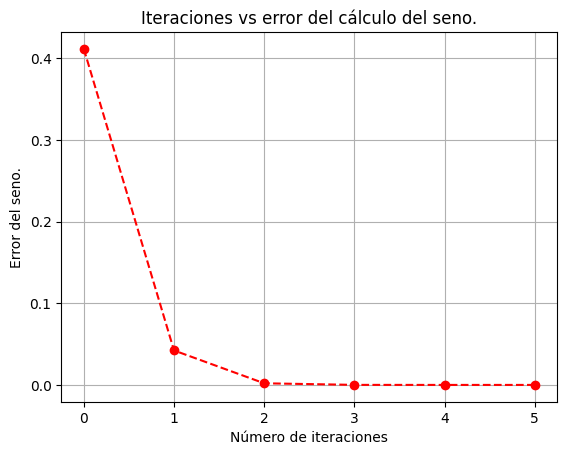

In [ ]:
plt.plot(N, err, "ro--")
#plt.legend()
plt.title("Iteraciones vs error del cálculo del seno.")
plt.ylabel("Error del seno.")
plt.xlabel("Número de iteraciones")
plt.grid()
plt.show()

In [ ]:
np.float32(math.sin(80*np.pi/180))

0.9848077

**Punto B**

In [ ]:
def taylor_seno64(angulo, tol):
  seno = 0
  max_iter = 100
  real = math.sin(angulo)
  i = 0
  errors = np.zeros(max_iter) #Guardar error
  iteraciones = np.arange(max_iter) # Iteración asociada al error

  while abs(real - seno) > tol:
    seno += (-1)**i * ((angulo**(2*i+1))/math.factorial(2*i+1))
    error = abs(real-seno)
    errors[i] = error #GUarda el error asociado
    i += 1 #Irá aumentando hasta que se cumpla la condición del while
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], seno, i

In [ ]:
y = math.radians(80)
tol_64 = np.finfo(np.float64).eps #Epsilon de la máquina
err64, N64, seno64, v = taylor_seno64(y, tol_64)
print(f'EL número de iteraciones para que la serie converga es: {v}')
print(seno64)

EL número de iteraciones para que la serie converga es: 10
0.9848077530122078


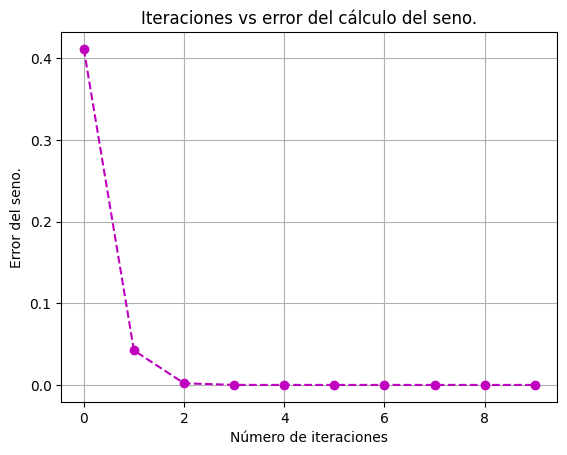

In [ ]:
plt.plot(N64, err64, "mo--")
#plt.legend()
plt.title("Iteraciones vs error del cálculo del seno.")
plt.ylabel("Error del seno.")
plt.xlabel("Número de iteraciones")
plt.grid()
plt.show()

In [ ]:
np.float64(math.sin(80*np.pi/180)) == math.sin(80*np.pi/180)
print(f'Valor default de seno: {math.sin(80*np.pi/180)}')
print(f'Valor del seno en 64 bits (numpy): {np.float64(math.sin(80*np.pi/180))}')

Valor default de seno: 0.984807753012208
Valor del seno en 64 bits (numpy): 0.984807753012208


**Punto C**

Error absoluto:

   $$\text{Error Absoluto} = |\text{Valor Exacto} - \text{Aproximación}|$$

Error relativo:

  $$\text{Error Relativo} = \left(\frac{|\text{Valor Exacto} - \text{Aproximación}|}{\text{|Valor Exacto|}}\right) $$

In [ ]:
sin32 = np.float32(math.sin(math.radians(80)))

EA = abs(sin32 - seno)
ER = abs(sin32 - seno)/abs(sin32)
print(f'El error absoluto para 32 bits es de: {EA} y el relativo es de: {ER}')

El error absoluto para 32 bits es de: 4.0402707845998975e-09 y el relativo es de: 4.102598570935504e-09


In [ ]:
sin64 = math.sin(math.radians(80))

EA64 = abs(sin64 - seno64)
ER64 = abs(sin64 - seno64)/abs(sin64)
print(f'El error absoluto para 64 bits es de: {EA64} y el relativo es de: {ER64}')

El error absoluto para 64 bits es de: 2.220446049250313e-16 y el relativo es de: 2.254700008665334e-16


#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

**a. Calcular la serie para valores de $x \leq 1$ y examinar la convergencia de esta.**

In [2]:
def series_exp(x, N):
  e = 0
  values = np.zeros(N)
  repeticion = np.zeros(N)
  for i in range(N):
    e += ((-1)**(i))*((x**i)/math.factorial(i))
    values[i] = e
    repeticion[i] = i
  return e, values, repeticion

In [3]:
series_exp(1,20)

(0.36787944117144245,
 array([1.        , 0.        , 0.5       , 0.33333333, 0.375     ,
        0.36666667, 0.36805556, 0.36785714, 0.36788194, 0.36787919,
        0.36787946, 0.36787944, 0.36787944, 0.36787944, 0.36787944,
        0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]))

In [4]:
def exp_inverse(x, max_iter, tolerance):
  real = np.exp(-x)
  #max_iter = 100
  exp_inverse = 0
  errores = np.zeros(max_iter)
  iteraciones = np.arange(max_iter)
  #valores = np.zeros(max_iter)
  i = 0

  while np.abs(exp_inverse - real) > tolerance:
    exp_inverse += ((-1)**(i))*((x**i)/math.factorial(i))
    #valores[i] = exp_inverse
    error = abs(exp_inverse - real)
    errores[i] = error
    i += 1

    if i > max_iter:
      break
  return exp_inverse, errores[:i], iteraciones[:i]

In [5]:
e, mistake, iter = exp_inverse(1, 37, 10e-7)
print(f'El valor de e^(-x) obtenido fue de: {e}')
print(f'Las iteraciones hasta alcanzar la condición fueron: {len(iter)}')
#print(v)

El valor de e^(-x) obtenido fue de: 0.3678791887125221
Las iteraciones hasta alcanzar la condición fueron: 10


In [7]:
np.exp(-1)

0.36787944117144233

In [9]:
def exp_inverse_cot(x, N, tolerance):
  real = exp_inverse(x, N, tolerance)[0]
  n1= 0

  for i in range(N):
    n1 += ((-1)**(i))*((x**i)/math.factorial(i))
    if abs(n1 - real) < tolerance:
      break
  return n1, i+1


In [ ]:
n_1, j = exp_inverse_cot(10, 100, 1e-07)
print(f'El valor n+1 para el que la serie converge es {n_1}, luego de {j} iteraciones.')

El valor n+1 para el que la serie converge es 4.5439110291729325e-05, luego de 39 iteraciones.


**b. Términos gandes y cancelación sustractiva**

In [ ]:
res, lista, repeat = series_exp(10, 11)
print(f"Valor calculado fue de {res} con {repeat} iteraciones")

Valor calculado fue de 1342.5873015873017 con [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] iteraciones


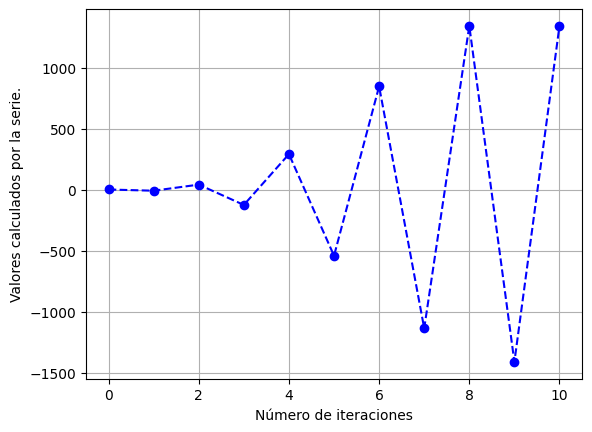

In [ ]:
plt.plot(repeat, lista, 'bo--')
plt.xlabel("Número de iteraciones")
plt.ylabel("Valores calculados por la serie.")
plt.grid(True)
plt.show()

**c. Usando la fórmula:**

$$ e^{-x} = \frac{1}{e^{x}} $$

In [ ]:
def serie_exponencial(x, N):
  e = 0
  values = np.zeros(N)
  repeticion = np.zeros(N)
  for i in range(N):
    e += ((x**i)/math.factorial(i))
    values[i] = e
    repeticion[i] = i
  return e, values, repeticion

In [ ]:
serie_exponencial(1,10)

(2.7182815255731922,
 array([1.        , 2.        , 2.5       , 2.66666667, 2.70833333,
        2.71666667, 2.71805556, 2.71825397, 2.71827877, 2.71828153]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
def exp_inverse_div(x, N):
  real = 1/serie_exponencial(x, N)[0]
  n1= 0
  num = np.zeros(N)
  iteracion = np.zeros(N)

  for i in range(N):
    n1 = 1/((x**i)/math.factorial(i))
    num[i] = n1
    iteracion[i] = i
  return num, iteracion


In [ ]:
lista2 , repeticion2 = exp_inverse_div(10,11)
print(f"Valores calculados {lista2}")
print(f'Lista de iteraciones {repeticion2}')

Valores calculados [1.0000e+00 1.0000e-01 2.0000e-02 6.0000e-03 2.4000e-03 1.2000e-03
 7.2000e-04 5.0400e-04 4.0320e-04 3.6288e-04 3.6288e-04]
Lista de iteraciones [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


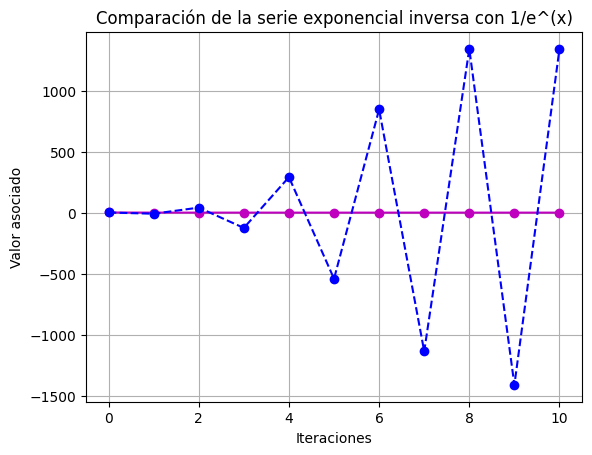

In [ ]:
plt.plot(repeticion2, lista2, 'mo-')
plt.plot(repeat, lista, 'bo--')
plt.title("Comparación de la serie exponencial inversa con 1/e^(x)")
plt.xlabel("Iteraciones")
plt.ylabel("Valor asociado")
plt.grid(True)
plt.show()

**d. Incremento de la serie y ver cuando pierde precisión**

In [ ]:
def valores_serie(a, b, n):
  result = np.zeros(b)
  num = np.zeros(b)
  for i in range(a,b):
    #print(i)
    q = series_exp(i, n)[0]
    #print(q)
    num[i] = i
    result[i] = q
  return result, num

In [ ]:
comparision, numeros = valores_serie(0,39,100)
comparision

array([ 1.00000000e+00,  3.67879441e-01,  1.35335283e-01,  4.97870684e-02,
        1.83156389e-02,  6.73794700e-03,  2.47875218e-03,  9.11881966e-04,
        3.35462628e-04,  1.23409804e-04,  4.53999294e-05,  1.67017021e-05,
        6.14421267e-06,  2.26032783e-06,  8.31532658e-07,  3.05934237e-07,
        1.12542942e-07,  4.18243923e-08,  1.46012758e-08,  2.90238500e-09,
        5.47810292e-10,  4.67354050e-09, -2.39041062e-08, -2.74990467e-08,
       -2.36418221e-07, -6.68956068e-07, -1.34665285e-06, -4.47412201e-06,
        5.01691064e-06,  5.50957532e-05, -8.55302069e-05, -1.55880108e-04,
       -2.59781070e-04,  8.48458705e-04, -9.04948495e-03, -8.22530270e-03,
       -1.20590653e-02, -1.57297247e-01, -1.20644592e+00])

In [ ]:
x1 = np.linspace(1, np.shape(comparision)[0], np.shape(comparision)[0])
y1 = np.exp(-x1)

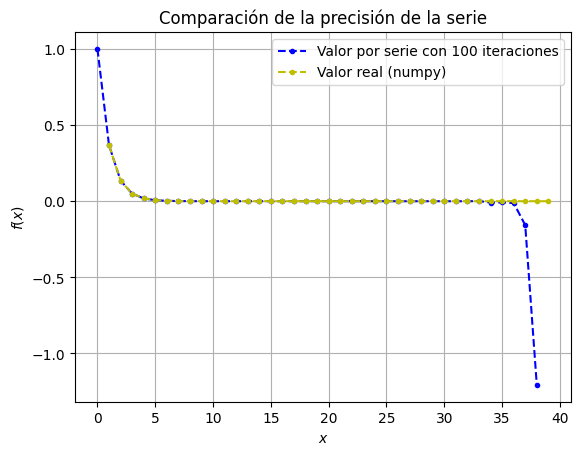

In [ ]:
plt.plot(numeros, comparision, 'b.--', label="Valor por serie con 100 iteraciones")
plt.plot(x1, y1, 'y.--', label="Valor real (numpy)")
plt.title("Comparación de la precisión de la serie")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
def precision(c,d,n):
  result = np.zeros(d)
  real = np.exp(-c)
  reales = np.zeros(d)
  num = np.zeros(d)
  N = np.zeros(d)
  for i in range(c,d):
    #print(i)
    p = np.exp(-i)
    q = series_exp(i, n)[0]
    u = abs(p-q)
    #print(q)
    num[i] = i
    N[i] = u
  return N, num

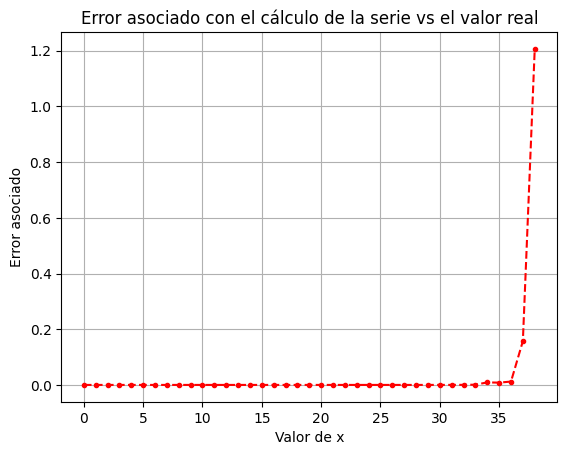

In [ ]:
errores, repetir = precision(0,39,100)

plt.plot(repetir, errores, 'r.--')
plt.title("Error asociado con el cálculo de la serie vs el valor real")
plt.xlabel("Valor de x")
plt.ylabel("Error asociado")
plt.grid(True)
plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


b. Estudiar la convergencia de la serie para los tres casos.


c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

In [ ]:
def sn1(N):
  S1 = 0
  for i in range(1,2*(N)+1):
    S1 += ((-1)**i)*(i/(i+1))
  return S1

In [ ]:
sn1(10)

0.2836095492055243

In [ ]:
def sn2(N):
  S2a = 0
  S2b = 0
  for i in range(1,N+1):
    S2a += 2*i/(2*i+1)
    S2b += (1-2*i)/(2*i)
  S2t = S2a+S2b
  return S2t

In [ ]:
sn2(10)

0.2836095492055257

In [ ]:
def sn3(N):
  S3 = 0
  for i in range(1,N+1):
    S3 += 1/((2*i)*(2*i+1))
  return S3

**b. Convergencia de las series**

In [ ]:
def conv_s1(N, tolerancia):
  S1 = 0
  s1 = 0
  for i in range(1,2*(N)+1):
    S1 += ((-1)**i)*(i/(i+1))
    if abs(S1-s1) <= tolerancia:
      break
    s1 = S1
  return S1, i

In [ ]:
conv_s1(100000, 1e-07)

(0.30685031945876495, 200000)

In [ ]:
def conv_s2(N, tolerancia):
  S2 = 0
  s2 = 0
  for i in range(1,N+1):
    S2 += 2*i/(2*i+1) + (1-2*i)/(2*i)
    if abs(S2-s2) < tolerancia:
      break
    s2 = S2
  return S2, i

In [ ]:
u , it = conv_s2(10000, 1e-07)
print(u)
print(f'Converge con una tolerancia de {1e-07}, luego de {it} iteraciones')

0.3066947666543659
Converge con una tolerancia de 1e-07, luego de 1581 iteraciones


In [ ]:
def conv_sn3(N, tolerancia):
  S3 = 0
  s3 = 0
  for i in range(1,N+1):
    S3 += 1/((2*i)*(2*i+1))
    if abs(S3-s3) < tolerancia:
      break
    s3 = S3
  return S3, i

In [ ]:
g, rpt = conv_sn3(10000, 1e-07)
print(g)
print(f'Converge con una tolerancia de 1e-07 luego de {rpt} iteraciones')

0.3066947666543708
Converge con una tolerancia de 1e-07 luego de 1581 iteraciones


**c. Comparación con la serie 3**

In [ ]:
def convergencia(max_iter, tol = 1e-08):
  S1 = 0
  S3 = 0
  N = np.linspace(1, 1e6, max_iter)
  #print(N)
  dif_a = np.zeros(len(N))
  for i in range(len(N)):
    S1 = sn1(int(N[i]))
    S3 = sn3(int(N[i]))
    error = abs((S1-S3)/S3)
    dif_a[i] = error
    #print(S1, S3)
  return dif_a, N

In [ ]:
dif1, b = convergencia(50)
dif1

array([1.66533454e-16, 6.98320445e-14, 1.21570459e-13, 1.09810681e-13,
       1.24282845e-13, 1.38212379e-13, 1.34594075e-13, 1.39840216e-13,
       1.26814905e-13, 1.49970753e-13, 1.74392934e-13, 2.04965894e-13,
       2.12744765e-13, 2.34272449e-13, 2.34815114e-13, 2.44764860e-13,
       2.29930588e-13, 2.28121502e-13, 2.27216946e-13, 2.12925410e-13,
       2.56342629e-13, 2.63397905e-13, 2.25769614e-13, 1.98272017e-13,
       1.87960411e-13, 1.86332253e-13, 2.19980588e-13, 2.20161480e-13,
       2.29025817e-13, 2.40603730e-13, 2.61769610e-13, 2.42955474e-13,
       2.32282067e-13, 2.33910203e-13, 2.33186575e-13, 2.39337338e-13,
       2.35357420e-13, 2.63759499e-13, 2.33367451e-13, 2.28663915e-13,
       2.66473052e-13, 2.77689155e-13, 3.07719376e-13, 3.23096292e-13,
       3.62714475e-13, 3.25086233e-13, 3.03015821e-13, 2.99940431e-13,
       2.83839884e-13, 3.08262049e-13])

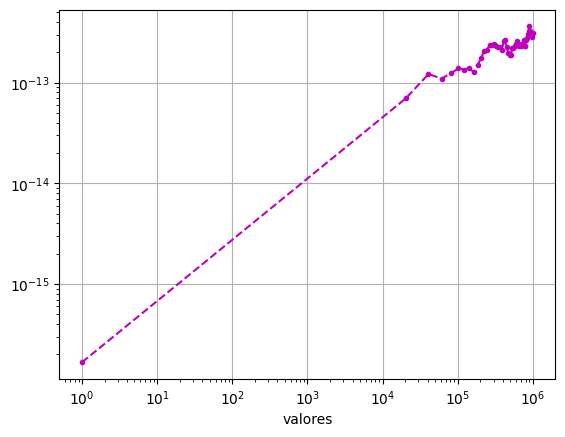

In [ ]:
plt.loglog(b, dif1, 'm.--')
plt.grid(True)
plt.xlabel("valores")
plt.show()

In [ ]:
def convergencia2(max_iter, tol = 1e-20):
  S2 = 0
  S3 = 0
  N = np.linspace(1, 1e6, max_iter)
  #print(N)
  dif_b = np.zeros(len(N))
  for i in range(len(N)):
    S2 = sn2(int(N[i]))
    S3 = sn3(int(N[i]))
    error = abs((S2-S3)/S3)
    dif_b[i] = error
    #print(S1, S3)
  return dif_b, N

In [ ]:
dif2, c = convergencia2(100)
dif2

array([1.66533454e-16, 2.97529191e-11, 8.16239240e-12, 3.02299161e-10,
       6.34769971e-10, 2.40786378e-10, 1.68518534e-10, 2.04971854e-09,
       1.63122029e-09, 2.02851269e-09, 3.41251981e-09, 8.45772047e-09,
       9.43111871e-09, 2.18710946e-08, 1.83078192e-08, 2.05317653e-08,
       1.83761121e-08, 1.74675775e-08, 1.62387572e-08, 2.39702576e-08,
       2.26297353e-08, 2.26997571e-08, 2.05820586e-08, 1.56135329e-08,
       1.57619548e-08, 1.55078184e-08, 9.08637989e-09, 7.89002154e-09,
       8.35091177e-09, 8.66231845e-09, 1.10775696e-08, 1.50993320e-08,
       9.90677420e-09, 1.07887090e-08, 9.07467194e-09, 1.02714768e-08,
       1.07378831e-08, 9.64104586e-09, 5.35720469e-09, 9.76907898e-10,
       4.68789061e-09, 7.39431434e-09, 4.53401277e-09, 1.77146285e-09,
       1.12418055e-09, 9.82499406e-10, 5.25315024e-10, 2.08661937e-10,
       2.01553028e-09, 5.66105633e-09, 6.50505659e-09, 6.93285135e-09,
       7.24934116e-09, 8.33412763e-09, 1.16409952e-08, 1.21788080e-08,
      

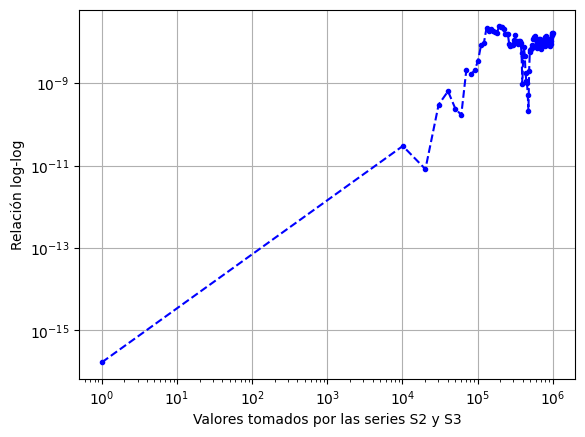

In [ ]:
plt.loglog(c, dif2, 'b.--')
plt.grid(True)
plt.xlabel("Valores tomados por las series S2 y S3")
plt.ylabel("Relación log-log")
plt.show()

**d. Discusión sobre las relaciones obtenidas.**

En el literal c de este punto, los gráficos describen la relación log-log entre el error obtenido al comparar el error relativo entre las series S1, S3 y S2, S3. Este error va en aumento a medida que los valores que toman las series se incrementa.

Para la comparación de S2 con S3 se probó qué ocurriría al incrementar el número de iteraciones y se obtiene el mismo resultado que, si el valor aumenta el error es proporcional a este aumento, siendo el error de los valores más pequeños de escalas de 10e-15 y ya en valores cercanos a 10.000 el error aumenta a 10e-09, lo cual es una diferencia de **seis ordenes de magnitud**.

Mientras que para la comparación de S1 y S3 la diferencia es un poco menor, siendo de 10e-05 para valores de 10 y para valores de 10.000 un error de 10e-13, sólo dos ordenes de magnitud más alto.